In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Density Estimation
<img src='https://images.unsplash.com/photo-1560091129-27a0e2af124b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZGVuc2l0eXxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=800&q=60' width=500 height=400>


### 밀도추정(density estimation)은 관측된 데이터 분포로부터 원래 변수의 확률 분포를 추정하고자 하는 것
- 1. outliers detection
- 2. non parametric classification
- 3. non parametric regression
- 4. cluster analysis / mode hunting

Mean shift 알고리즘을 이해하기 위해 Mode hunting 방법을 Histogram을 통해 살펴본다.
   * 히스토그램은 특성변수를 partitionning하는 것이며 히스토그램의 Bins는 partition과 동일하다.

In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['axes.unicode_minus'] = False

## 1. Simple 1D Kernel Density Estimation
- 1차원의 Kernel Density Estimation에 대한 이해
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

### 1.1 임의의 가우시안 확률분포 2개를 생성 (Hiddn process(평군과 분산의 종류)무작위로)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

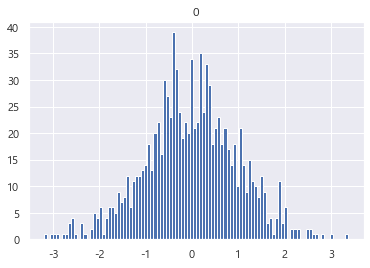

In [26]:
num_points= 1000
x = np.random.randn(num_points)
pd.DataFrame(x).hist(bins=100)

배열의 308 번째 slice해서 이후는 6를 누적하여 더한다


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

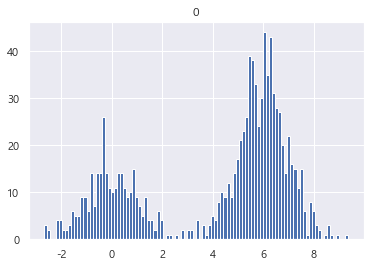

In [27]:
random_slice = int(np.random.rand()* num_points)
intt = np.random.randint(0, 10)
print(f'배열의 {random_slice} 번째 slice해서 이후는 {intt}를 누적하여 더한다')
x[random_slice:] += intt
pd.DataFrame(x).hist(bins=100)

### N개의 정규분포 모집단 생성

모집단의 평균은 3.6630208225616947


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

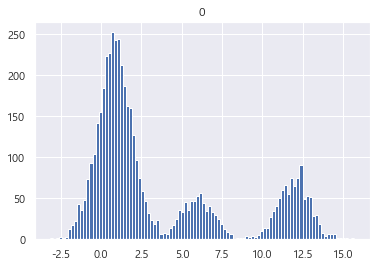

In [28]:
def generate_random_data(num_points: int, n_randomization: int=3):
    x = np.random.randn(num_points)
    for _ in range(n_randomization):
        random_slice = int(np.random.rand() * num_points)
        x[random_slice:] += np.random.randint(0, 10)

    return x

population = generate_random_data(5000)
print(f'모집단의 평균은 {population.mean()}')
pd.DataFrame(population).hist(bins=100)
# plt.hist(generate_random_data(5000), bins=100)
plt.show()

(array([18., 78., 34.,  6., 15.,  8.,  1., 11., 24.,  5.]),
 array([-1.91682713, -0.23270219,  1.45142276,  3.13554771,  4.81967265,
         6.5037976 ,  8.18792255,  9.87204749, 11.55617244, 13.24029738,
        14.92442233]),
 <BarContainer object of 10 artists>)

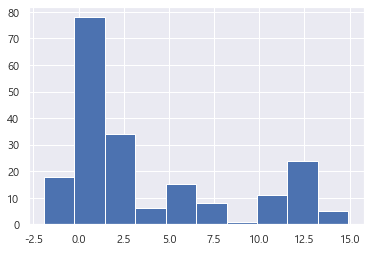

In [29]:
sample = np.random.choice(population, 200)
plt.hist(sample)

Text(0.5, 1.0, 'Gaussian Kernel Density')

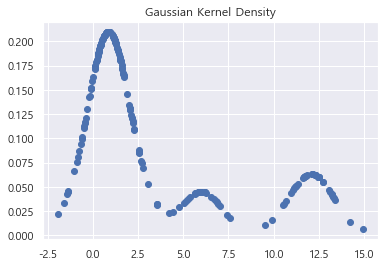

In [30]:
from sklearn.neighbors import KernelDensity
X_plot = np.sort(sample)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(sample.reshape(-1,1))
log_dens = kde.score_samples(X_plot)
plt.scatter(X_plot[:, 0], np.exp(log_dens))
plt.title("Gaussian Kernel Density")
plt.show()

<AxesSubplot:ylabel='Density'>

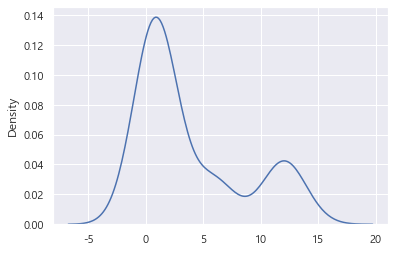

In [31]:
sns.kdeplot(sample.reshape(-1,1).ravel())

<AxesSubplot:ylabel='Density'>

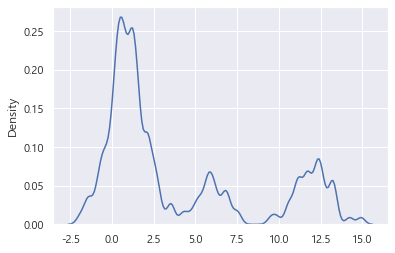

<AxesSubplot:ylabel='Density'>

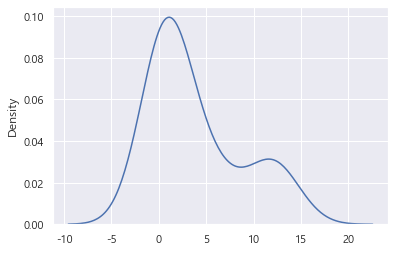

<AxesSubplot:ylabel='Density'>

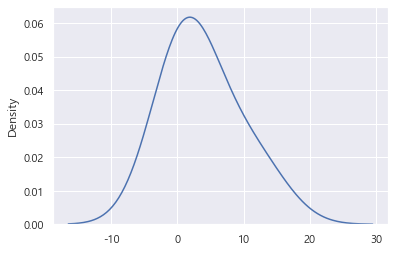

<AxesSubplot:ylabel='Density'>

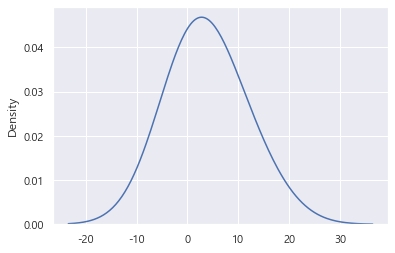

In [35]:
for i in np.arange(0.05, 2, 0.5):
    sns.kdeplot(sample.reshape(-1,1).ravel(), bw=i); plt.show()

## The importance of kernel density estimation bandwidth
### bandwidth selection affects plot smoothness
- https://aakinshin.net/posts/kde-bw/

In [46]:
a = np.array([21.370, 19.435, 20.363, 20.632, 20.404, 19.893, 21.511, 19.905, 22.018, 19.93,
              31.304, 32.286, 28.611, 29.721, 29.866, 30.635, 29.715, 27.343, 27.559, 31.32,
              39.693, 38.218, 39.828, 41.214, 41.895, 39.569, 39.742, 38.236, 40.460, 39.36,
              50.455, 50.704, 51.035, 49.391, 50.504, 48.282, 49.215, 49.149, 47.585, 50.03])

<AxesSubplot:ylabel='Density'>

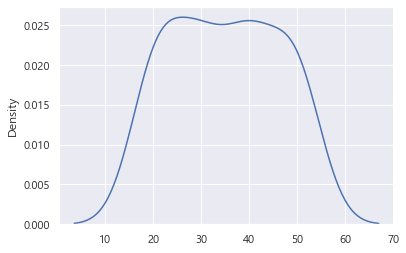

In [47]:
sns.kdeplot(a)

<AxesSubplot:ylabel='Density'>

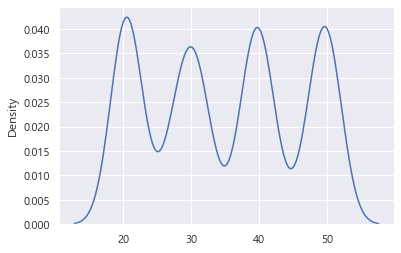

In [50]:
sns.kdeplot(a, bw=0.2)

## 2. Bootstrapping

In [36]:
# 표본수 200개에서 반복하여 복원 추출 100회 재표본
bootstrap=[]
for i in range(1,101): # 100회 재표본
    trial = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap.append(trial)

pd.DataFrame(bootstrap).head()

0         1         2         3         4         5          6    \
0   2.067532 -0.313895  6.049543  0.400770  1.165111  2.560201   0.949695   
1   5.797158  0.695300  3.561644 -0.102916 -1.614196  0.288853  11.208572   
2   1.697402  0.408171 -0.760961  0.288314 -0.313895  0.420431   2.067532   
3  -0.455838  1.240546  0.420431 -0.760961  0.504627  1.211365   0.188019   
4  11.604044  1.108288  0.617170  0.292806  1.904512  5.936146  12.278599   

        7          8         9    ...       190        191        192  \
0 -0.629779   6.188424  6.049543  ...  1.211365   1.259579   0.137851   
1  6.845325   0.188019  0.859063  ...  0.699932  -0.408969  11.699565   
2  1.159821   0.865234  1.240546  ... -0.608487  11.691635   0.789700   
3  1.159821   1.480697  2.708037  ...  0.617170   0.773004   0.773004   
4 -0.504379  12.751149  0.817029  ...  2.560201   9.892327   1.107103   

        193        194        195        196        197        198        199  
0  0.768773   4.187908   2.286803   5.378631   1.528386  -0.900080   5.622280  
1  0.695300  12.347007   2.536717  10.976058  12.457266   6.925098   0.288853  
2  0.773004   0.188019   5.378631   0.608213   3.519480  12.123270  11.064716  
3 -0.455838   0.117165  12.507562   0.311028   1.616995   1.375546   1.440761  
4 -0.900080   1.627290   1.616995  -0.629779   3.561644   1.670450   2.131569  

[5 rows x 200 columns]

### 중심극한 정리

<AxesSubplot:>

3.791464277672387

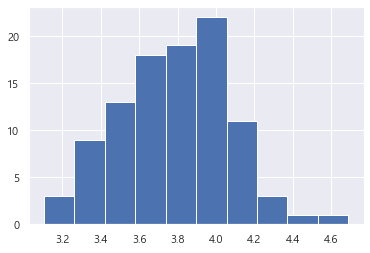

In [37]:
pd.DataFrame(bootstrap).mean(1).hist()
pd.DataFrame(bootstrap).mean(1).mean()

## 3. 히스토그램을 kernels로 변환
### 3.1 데이터의 산포도(scatter)

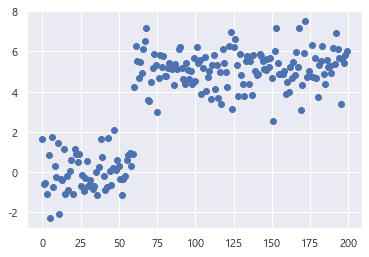

In [38]:
np.random.seed(1)
N = 200
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
plt.scatter(np.arange(N), X)

## 3. 히스토그램(Histogram, 도수분포도)
- 개별 인스턴스를 보여주는 막대그래프와는 다르며 데이터의 range, 사분위수, 백분위수, 표준편차 등으로 표현
- 도수분포도는 각 구간(bin)별에 관측된 도수(관측빈도)를 막대그래프로 표현한 그래프
- 전체 자료의 범위를 구간(백분위수, 4분위수 등등)으로 구분하고, 각 구간에 포함되는 자료의 도수)개수를 산출한 표

### bandwidth와 그래프를 이해

### 관측값의 최대 최소값을 균등 분할

bin의 간격은 X의 최소갑-2.3015386968802827과 최대값7.528325706806398을 10개로 균등 분할


Text(0.5, 1.0, '10개 균등분할 bins의 Histogram')

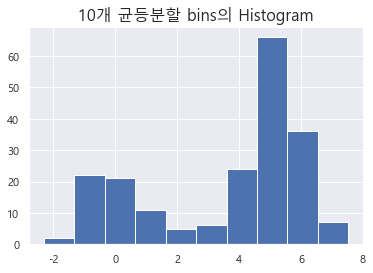

In [39]:
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰드 꺠짐 방지
ax= plt.hist(X, bins=10)
print(f'bin의 간격은 X의 최소갑{X.min()}과 최대값{X.max()}을 10개로 균등 분할')
plt.title("10개 균등분할 bins의 Histogram", fontsize=16)

### 관측값의 특정 구간을 균등 지정하는 bin

array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ])

Text(0.5, 1.0, 'Histogram')

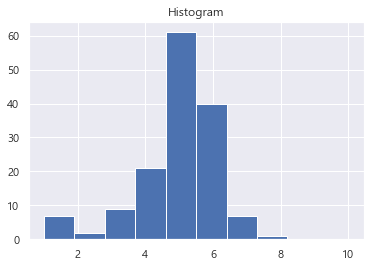

In [40]:
bins = np.linspace(1, 10, 11) # 구간
bins
ax = plt.hist(X, bins=bins)
plt.title("Histogram")

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

Text(0.5, 1.0, 'Histogram')

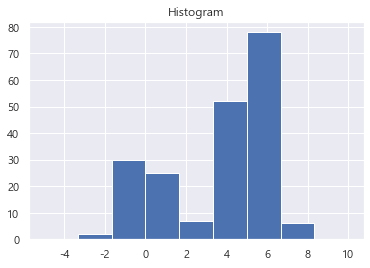

In [41]:
bins = np.linspace(-5, 10, 10) # 구간
bins
ax = plt.hist(X, bins=bins); plt.title("Histogram")

### 균등분할 bins, 위치이동, bins의 증가

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

(array([ 0.,  2., 30., 25.,  7., 52., 78.,  6.,  0.]),
 array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
         3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ]),
 <BarContainer object of 9 artists>)

Text(0.5, 1.0, 'Histogram')

<AxesSubplot:>

(array([ 0.,  8., 38., 14., 18., 88., 33.,  1.,  0.]),
 array([-4.25      , -2.58333333, -0.91666667,  0.75      ,  2.41666667,
         4.08333333,  5.75      ,  7.41666667,  9.08333333, 10.75      ]),
 <BarContainer object of 9 artists>)

Text(0.5, 1.0, 'Histogram, bins shifted')

<AxesSubplot:>

(array([ 2.,  0.,  9., 13., 11., 10.,  8.,  3.,  4.,  1.,  2.,  4., 11.,
        13., 30., 36., 23., 13.,  3.,  4.]),
 array([-2.3015387 , -1.81004548, -1.31855226, -0.82705904, -0.33556582,
         0.1559274 ,  0.64742062,  1.13891384,  1.63040706,  2.12190028,
         2.6133935 ,  3.10488673,  3.59637995,  4.08787317,  4.57936639,
         5.07085961,  5.56235283,  6.05384605,  6.54533927,  7.03683249,
         7.52832571]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram, much more bins')

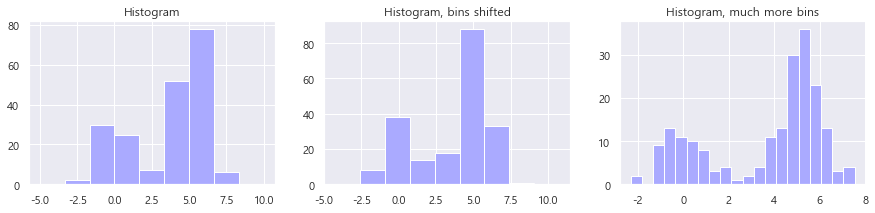

In [42]:
plt.figure(figsize=(15,3)) # create a plot figure
# create the first of two panels and set current axis
plt.subplot(1, 3, 1) # (rows, columns, panel number)
plt.hist(X, bins=bins, fc='#AAAAFF')
plt.title("Histogram")

# create the second panel and set current axis
plt.subplot(1, 3, 2)
plt.hist(X, bins=bins + 0.75, fc='#AAAAFF')
plt.title("Histogram, bins shifted")

# create the second panel and set current axis
plt.subplot(1, 3, 3)
plt.hist(X, bins= 20, fc='#AAAAFF')
plt.title("Histogram, much more bins")

### bins 구성에 따라 데이터 분포가 다르게 나타나게 되어 mis visulization 가능성이 있다. bin의 개수가 많아지면 질수록 noise가 있을 수 있으나 세밀한 분포를 알 수가 있다.

### 관측값 X를 커널로 fitting하여 -5 부터 10까지 구간을 1,000개로 구분한(bins=1,000) 값을 생성

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

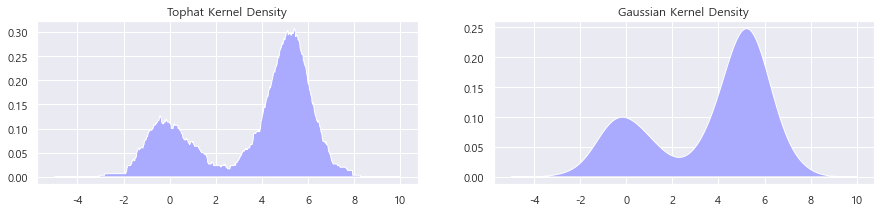

In [43]:
from sklearn.neighbors import KernelDensity

plt.figure(figsize=(15,3)) # create a plot figure
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]    # np.linspace(-5, 10, 1000).reshape(-1,1)
# create the first of two panels and set current axis

# tophat KDE
plt.subplot(1, 2, 1) # (rows, columns, panel number)
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Tophat Kernel Density")

# Gaussian KDE
plt.subplot(1, 2, 2)
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Gaussian Kernel Density")

Intuitively, one can also think of a histogram as a stack of blocks, one block per point. By stacking the blocks in the appropriate grid space, we recover the histogram. But what if, instead of stacking the blocks on a regular grid, we center each block on the point it represents, and sum the total height at each location? This idea leads to the lower-left visualization. It is perhaps not as clean as a histogram, but the fact that the data drive the block locations mean that it is a much better representation of the underlying data.

https://rstudio-pubs-static.s3.amazonaws.com/238698_f5c485e2a4f2441dbc9a52ebda0fe8c0.html

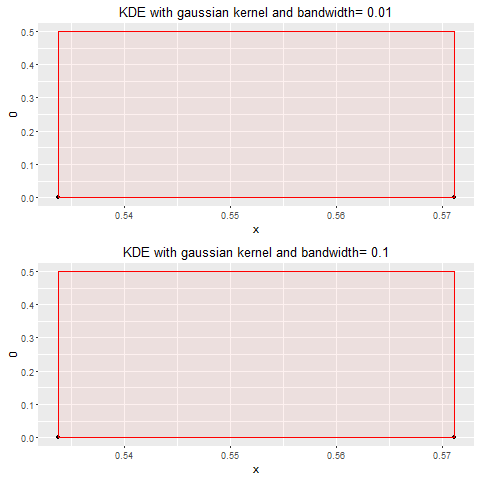

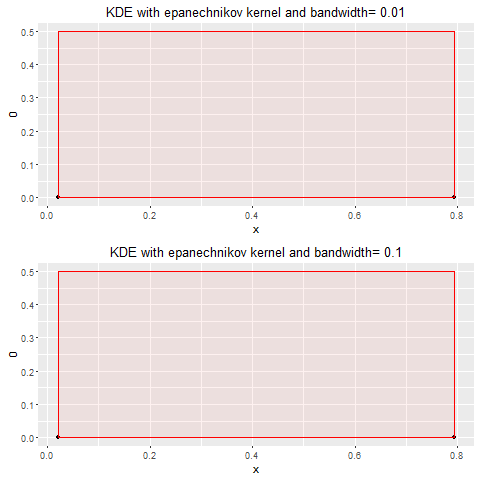

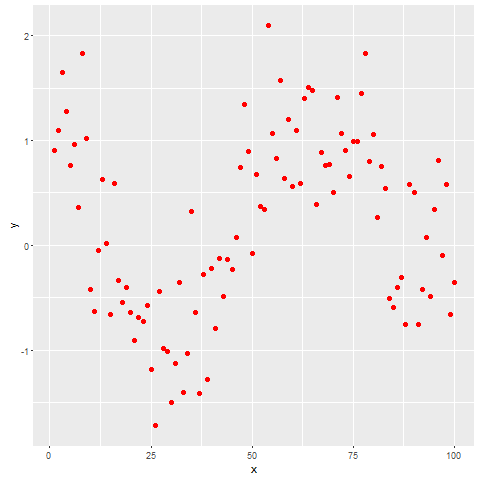

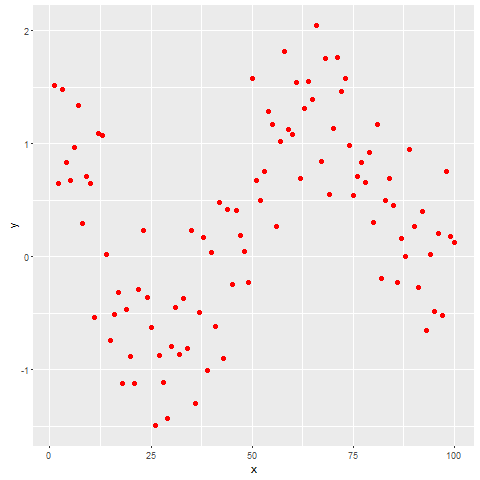

<AxesSubplot:ylabel='Density'>

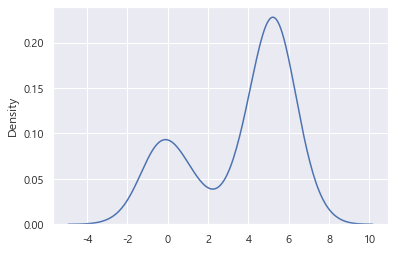

In [122]:
sns.kdeplot(X.ravel())

# End

## Pairwise metrics, Affinities and Kernels (for further study)
https://scikit-learn.org/stable/modules/metrics.html#metrics

### Scikit-learn implements efficient kernel density estimation 
- kde using either a Ball Tree or KD Tree structure, through the KernelDensity estimator. 
- The available kernels are shown as belows

In [90]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

Text(-2.6, 0.95, 'gaussian')

(0.0, 1.05)

(-2.9, 2.9)

Text(-2.6, 0.95, 'tophat')

(0.0, 1.05)

(-2.9, 2.9)

Text(-2.6, 0.95, 'epanechnikov')

(0.0, 1.05)

(-2.9, 2.9)

Text(-2.6, 0.95, 'exponential')

(0.0, 1.05)

(-2.9, 2.9)

Text(-2.6, 0.95, 'linear')

(0.0, 1.05)

(-2.9, 2.9)

Text(-2.6, 0.95, 'cosine')

(0.0, 1.05)

(-2.9, 2.9)

Text(0.5, 1.0, 'Available Kernels')

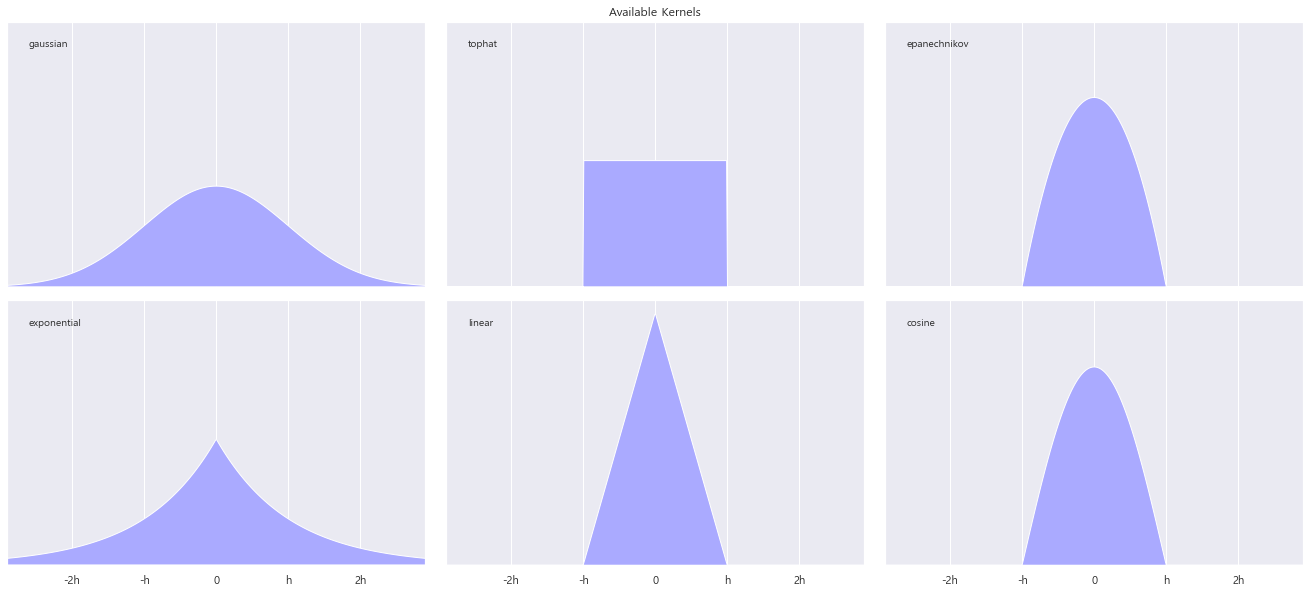

In [91]:
# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20, 10))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

## kernel density estimates for a distribution of 100 samples in 1 dimension. 
- Though this example uses 1D distributions, kernel density estimation is easily and efficiently extensible to higher dimensions as well.
- Kernel density estimation in scikit-learn is implemented in the KernelDensity estimator, which uses the Ball Tree or KD Tree for efficient queries (see Nearest Neighbors for a discussion of these). 
- Though the below example uses a 1D data set for simplicity, kernel density estimation can be performed in any number of dimensions, though in practice the curse of dimensionality causes its performance to degrade in high dimensions.

In the following figure, 100 points are drawn from a bimodal distribution, and the kernel density estimates are shown for three choices of kernels:
### Plot a 1D density example

Text(6, 0.38, 'N=100 points')

(-4.0, 9.0)

(-0.02, 0.4)

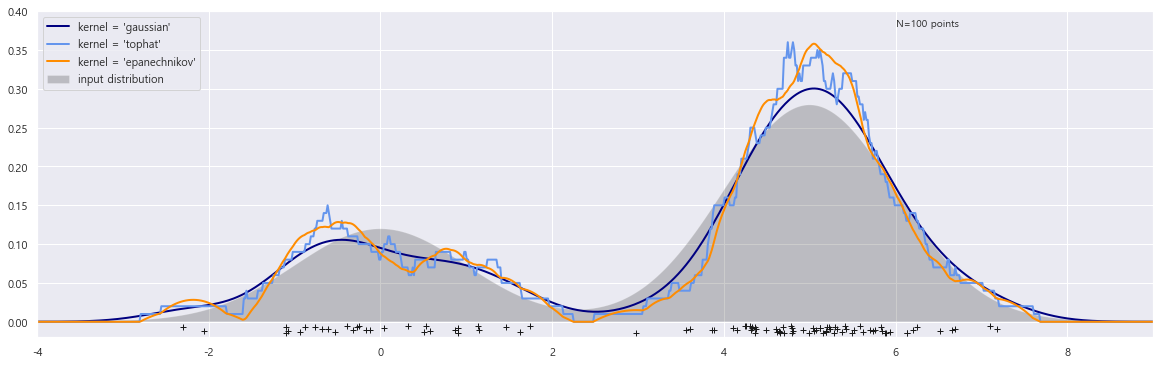

In [92]:
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(20, 6))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

- It’s clear how the kernel shape affects the smoothness of the resulting distribution. The scikit-learn kernel density estimator can be used as follows:
- https://scikit-learn.org/stable/modules/density.html#kernel-density

## Kernel로 iris 데이터를 unsupervised learning으로 몇 개의 그룹인지 확인

In [93]:
from sklearn.datasets import load_iris
X = load_iris().data

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

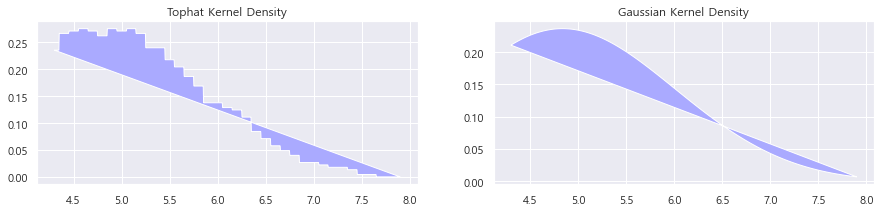

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

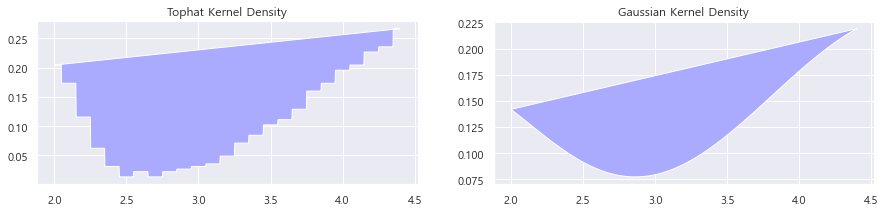

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

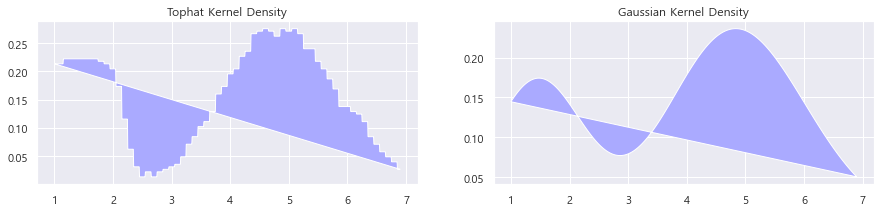

<Figure size 1080x216 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tophat Kernel Density')

<AxesSubplot:>

Text(0.5, 1.0, 'Gaussian Kernel Density')

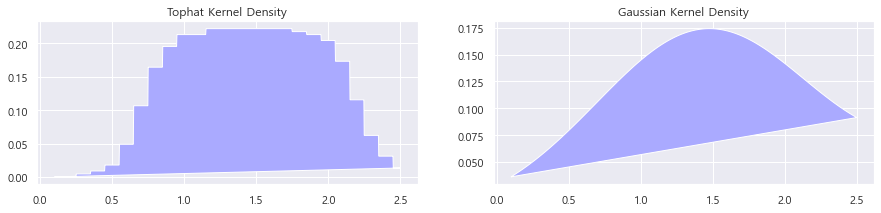

In [94]:
from sklearn.neighbors import KernelDensity

for i in np.arange(4) :

    plt.figure(figsize=(15,3)) # create a plot figure
    X_plot = np.linspace(X[:, i].min(), X[:, i].max(), 1000)[:, np.newaxis]  
    
    # create the first of two panels and set current axis

    # tophat KDE
    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X[:, 2].reshape(-1,1))
    log_dens = kde.score_samples(X_plot)
    plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
    plt.title("Tophat Kernel Density")

    # Gaussian KDE
    plt.subplot(1, 2, 2)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X[:, 2].reshape(-1,1))

    log_dens = kde.score_samples(X_plot)
    plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
    plt.title("Gaussian Kernel Density")
    
    plt.show()

sepal length (cm) & sepal width (cm)


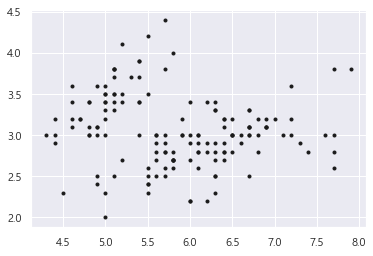

sepal length (cm) & petal length (cm)


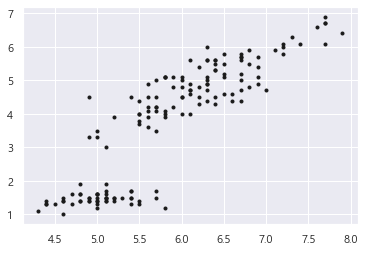

sepal length (cm) & petal width (cm)


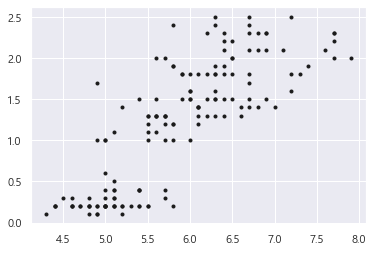

sepal width (cm) & petal length (cm)


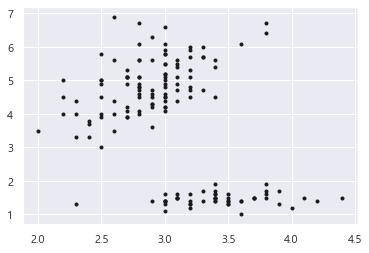

sepal width (cm) & petal width (cm)


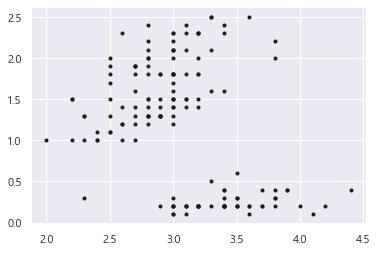

petal length (cm) & petal width (cm)


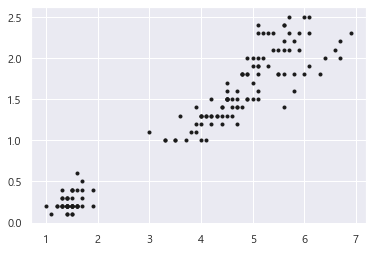

In [95]:
import itertools
for i, j in itertools.combinations([0,1,2,3], 2):
    features = load_iris()['feature_names']
    print(f'{features[i]} & {features[j]}')
    plt.scatter(X[:, i], X[:, j], c="k", marker=".")
    plt.show()

# END

## Illustration of prior and posterior Gaussian process for different kernels

This example illustrates the prior and posterior of a GPR with different kernels. Mean, standard deviation, and 10 samples are shown for both prior and posterior.

- https://towardsdatascience.com/real-time-time-series-anomaly-detection-981cf1e1ca13
- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html